In [1]:
%%html
<style>
div.analyze {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# Model analysis

The grid search was done to tune the hyper parameter for finding the optimum circuit configuration for the base case specifications.

For analyzing how quickly and how reliably does the algorithm converge on the optimum and how does this change with the genetic algorithm parameters such as the number of child vectors used and the mutation rate, the graphs were plotted with the `different hyperparameters` represented on the `x-axis`. The number of iterations required for the algorithm to converge was indicated by the `red line` plotted against the `left y-axis`, reflecting the speed of convergence. The optimum fitness achieved by the algorithm, indicating the quality of the solution found, was represented by the `blue line` plotted against the `right y-axis`. To provide a more reliable measure of performance, the number of iterations required for the algorithm to converge and the best fitness were `averaged over ten trials`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def plot_graph(x_axis, df):
    fig, ax1 = plt.subplots()
    
    ax1.plot(df.iloc[:, 0], df.iloc[:, 1], 'r', label='Iteration of GA algorithm')
    ax1.set_xlabel(x_axis, fontsize=16)
    ax1.set_ylabel('Iteration of GA algorithm', fontsize=16)
    ax1.set_title('', fontsize=16)

    ax2 = ax1.twinx()
    ax2.plot(df.iloc[:, 0], df.iloc[:, 2], 'b', label='Optimal fitness')
    ax2.set_ylim(200, 400)
    ax2.set_ylabel('Optimal fitness', fontsize=16)

    fig.legend(loc = 'upper right', fontsize="14");

## Stop criteria

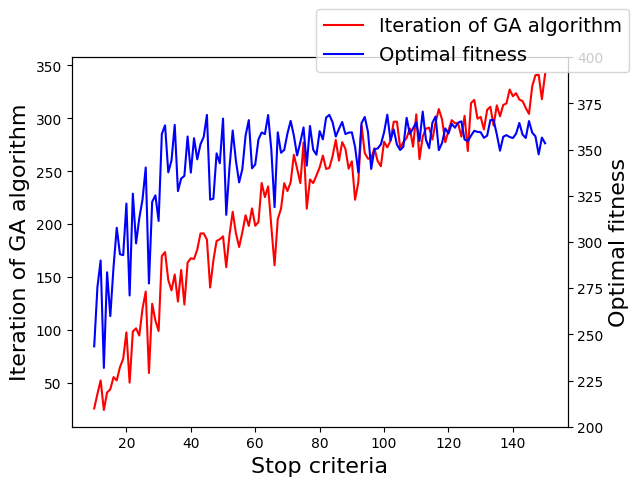

In [4]:
file_path = "./result_iter_without_progress.dat"
df = pd.read_csv(file_path, header=None, sep=",")
plot_graph("Stop criteria", df)

<div class="analyze">
    
This stop criteria determines the maximum number of iterations allowed without any improvement in fitness before the algorithm terminates. A smaller value for the number of iterations without progress in fitness as the stop criteria will result in a faster convergence, but it is easier to result in local optimal solutions. A larger value for the number of iterations without progress in fitness provides the algorithm with more time to explore the solution space and potentially reach the global optimum.

</div>

## Parent size

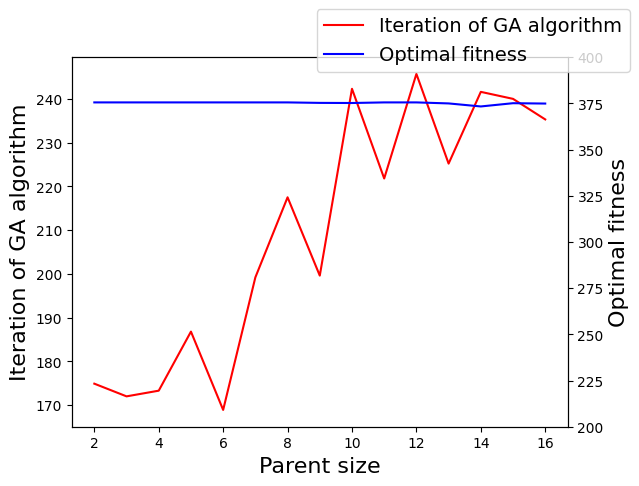

In [5]:
file_path = "./result_parent_size.dat"
df = pd.read_csv(file_path, header=None, sep=",")
plot_graph("Parent size", df)

<div class="analyze">

Parent size refers to the number of individuals selected as parents for creating the next generation. A larger parent size allows for a greater diversity of individuals in the population, but implies a larger population to evaluate and process, potentially increasing the computational time required for each generation.
    
</div>

## Population size

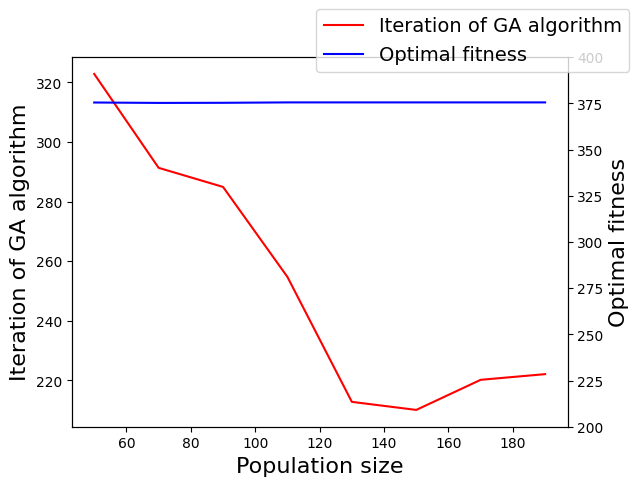

In [6]:
file_path = "./result_population_size.dat"
df = pd.read_csv(file_path, header=None, sep=",")
plot_graph("Population size", df)

<div class="analyze">

Increasing the number of child vectors generally decreases the iteration to converge. However, when the population size is larger, this improvement came with a potential trade-off of more iterations.

</div>

## Mutation

<div class="analyze">

The mutation operation is implemented by two  hyperparameters: the mutation rate and the mutation size.

Mutation Rate: The mutation rate determines whether a particular circuit will undergo mutation. Typically set around 0.6, this parameter controls the probability of a circuit being mutated. When the mutation rate is higher, there is a greater chance for mutation to occur.

Mutation Size: The mutation size determines the number of mutation units that will be modified in a circuit during a mutation operation. It ranges from 0 to the total number of units in the circuit.
 
The mutation scheme where each gene is mutated according to the mutation rate is also implemented and can be used based on user input parameters. However, if this mutation scheme is used together with mutation rate increasing factor, this will dramatically slow down the iteration when iteration count is large. As a result, we set the default scheme to the previously described scheme for better scaling.


Observations:
    
Optimal Mutation Rate: When the mutation rate is set around 0.6, the best fitness results are obtained, indicating that this rate strikes a balance between exploration and exploitation. Furthermore, increasing the mutation rate reduces the number of iterations required to converge on a solution.

Larger Mutation Size: Increasing the mutation size can lead to an increase in the number of iterations required. This might be because a larger mutation size introduces too many changes to the circuit, causing good parent solutions to be mutated and potentially disrupting their effectiveness in the child generation.

</div>

### mutation_rate

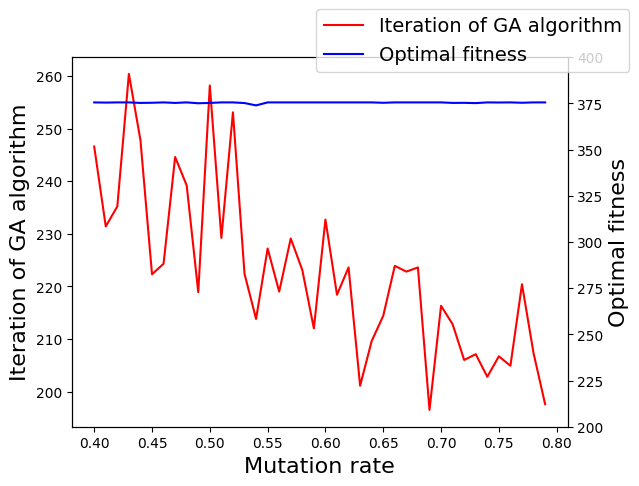

In [7]:
file_path = "./result_mutation_rate.dat"
df = pd.read_csv(file_path, header=None, sep=",")
plot_graph("Mutation rate", df)

### mutation_size

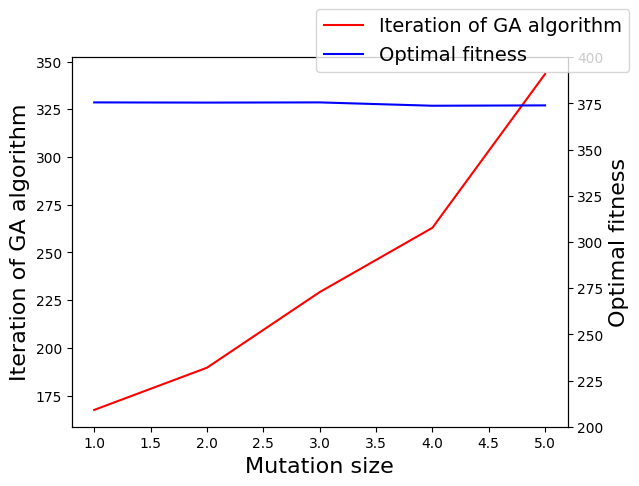

In [8]:
file_path = "./result_mutation_size.dat"
df = pd.read_csv(file_path, header=None, sep=",")
plot_graph("Mutation size", df)

## Crossover rate

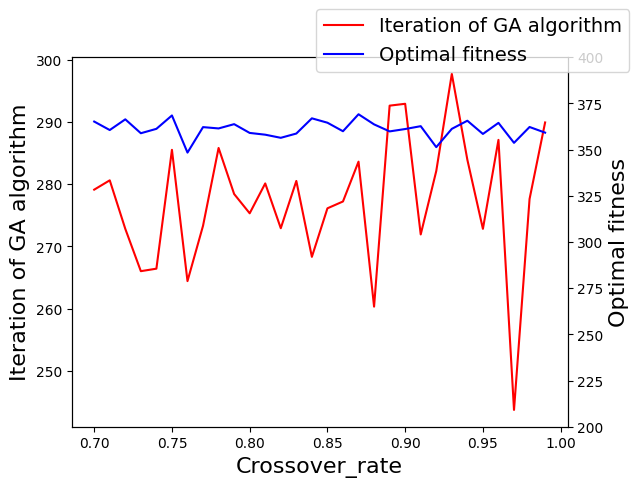

In [9]:
file_path = "./result_crossover_rate.dat"
df = pd.read_csv(file_path, header=None, sep=",")
plot_graph("Crossover_rate", df)

<div class="analyze">

The crossover rate is set within the range of 0.7 to 1. This parameter determines the probability of performing a crossover operation. A higher crossover rate increases the likelihood of crossover occurring, promoting the exploration of different genetic combinations.
    
Based on the experiments conducted, it was observed that varying the crossover rate within this range did not result in significant differences in the algorithm's performance. This suggests that the specific value of the crossover rate within this range does not have a substantial impact on the convergence speed or solution quality.
    
The lack of significant differences may be specific to this base case specification. It is still important to consider the crossover rate as it influences the balance between exploration and exploitation in the genetic algorithm.

</div>